In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import Data

In [2]:
path = os.path.join(os.getcwd(), 'data', 'ex1data1.txt')

In [3]:
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [4]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


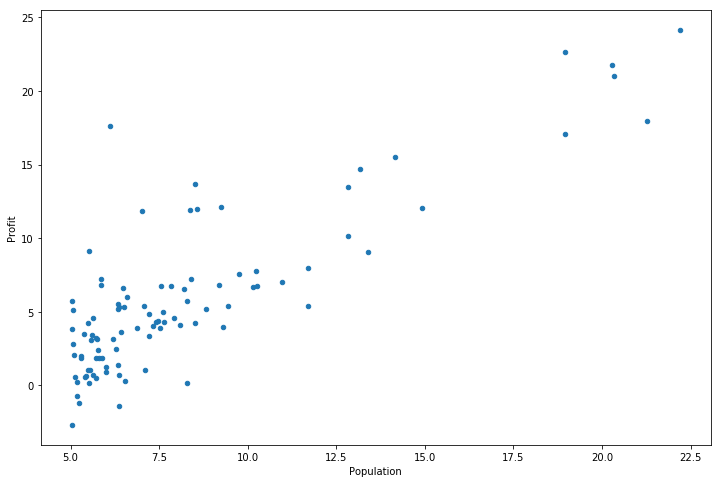

In [6]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [43]:
def computeCost(X, y, theta):
    """
    Implement cost function
    """
    inner = np.power((X*theta.T - y), 2)
    m = len(X) # since X is an m x n matrix.
    return np.sum(inner) / (2 * m)

Here's an example of the above.

In [17]:
X = [[1,2,4,2],[1,5,7,2]]
theta = [4,6,32,7]
y = [2,2]

In [18]:
X = np.matrix(X)
theta = np.matrix(theta)
y = np.matrix(y)

In [21]:
y

matrix([[2, 2]])

In [25]:
inner = np.power(X * theta.T - y.T, 2)

In [27]:
inner

matrix([[24336],
        [72900]], dtype=int32)

In [26]:
np.sum(inner)

97236

To make data work w/ this, need to manipulate a bit.

In [28]:
data.insert(0,'Ones',1)

In [29]:
data.shape

(97, 3)

In [30]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [37]:
data.iloc[1,1] # so we see that this is iloc[r,c] where r = row, c = column.

5.5277000000000003

So we want X to be a matrix that includes Ones and Population, while y is the column containing just Profit.

In [38]:
cols = data.shape[1]
X = data.iloc[:, 0:cols-1] # all rows, just Ones and Population Columns
y = data.iloc[:, cols-1:cols] # just the final column, but all rows

In [39]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


Now we make these into numpy matrices, make a parameter matrix (theta_0, theta_1)

In [40]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [41]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [44]:
computeCost(X,y,theta)

32.072733877455676

woof

## Linear Regression w One Variable